<a href="https://colab.research.google.com/github/LaylaNasc/AnaliseDeDados_ProgaMaria/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/AnaliseDeDados_PrograMaria/analise_dados_mod7_(1).xlsx')

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [ ]:
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [ ]:
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

In [ ]:
dados['Quanto tempo de experiência na área de dados você tem?'].value_counts()

,count
Quanto tempo de experiência na área de dados você tem?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [ ]:
dados['TEMPO_EXPERIENCIA'] = dados['Quanto tempo de experiência na área de dados você tem?'].str.extract(r'(\d+)')


In [ ]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3000,1313
de 101 a 500,503
de 1001 a 3000,368
de 501 a 1000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


In [ ]:
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [ ]:
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


In [ ]:
dados['INSATISFACAO'] = 0

In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário ' in x else 0)

,Qual o principal motivo da sua insatisfação com a empresa atual?
1,0
2,0
7,1
10,0
26,1
...,...
4227,0
4234,1
4238,0
4240,1


In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário ' in x else 0)

In [ ]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


na coluna nivel de ensino usei o apply e lambda fazendo um algoritmo

In [ ]:
dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x== 'Não tenho graduação formal' else
                               1 if x== 'Estudante de Graduação' else
                               1 if x== 'Graduação/Bacharelado' else
                               1 if x== 'Pós-graduação' else
                               1 if x== 'Doutorado ou Phd' else -1)

,NIVEL DE ENSINO
1,1
2,1
3,1
6,1
7,1
...,...
4262,1
4263,1
4266,1
4267,-1


In [ ]:
dados['NIVEL DE ENSINO']= dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x== 'Não tenho graduação formal' else
                               1 if x== 'Estudante de Graduação' else
                               1 if x== 'Graduação/Bacharelado' else
                               1 if x== 'Pós-graduação' else
                               1 if x== 'Doutorado ou Phd' else -1)

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO', 'SETOR', 'REGIAO ONDE MORA',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL']]

In [ ]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [ ]:
dados = pd.get_dummies(dados, columns=['GENERO', 'REGIAO ONDE MORA', 'SETOR', 'NOVO_NIVEL'], drop_first=True)

In [ ]:
x = dados.drop('SALARIO', axis=1)
y = dados['SALARIO']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #o 0.2 significa que 20% dados e 80% para o tratamento e o random_state garante que a divisão dos dados seja reproduzivel

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)



AGORA VAOS COMEÇAR A TREINAR O MODELO, USANDO O MODELO DE Linear Regression da biblioteca Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()


In [ ]:
modelo.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
modelo.predict(x_test_scaled)

array([22489.58550902, 15746.23353125,  3984.4913531 ,  4010.62177137,
       16965.0374266 ,  6159.65939505,  2741.1781459 , 12846.60983332,
        3569.21512374, 11971.82611827,  8307.80107496,  8189.33697834,
        7501.81270366, 18003.19852984, 18415.74223317,  9627.39926287,
       11143.70178155,  7584.82757993,  4413.56502615, 13612.80797139,
        7197.59502355, 11827.11401965, 18098.06210396,  6945.32807209,
       10065.68480935, 22432.98911835,  9271.23190082, 11950.49731496,
        9450.42900339, 20545.16832573, 12632.89900465, 12307.55958879,
       18300.37070205,  5732.41680439,  5763.81906486,  3891.87682883,
       16266.23908168,  9017.29378508, 11811.78605188,  3228.17036383,
        8307.80107496,  8028.14975087,  4017.85831705,  6902.6168796 ,
       13678.26747873, 10840.82276535, 14834.78550879,   444.33997902,
        5835.66461428, 22835.5368584 ,  9071.52453294, 10290.0671818 ,
       18759.48433593,  9017.29378508, 17607.65478006, 12593.66667711,
      

In [ ]:
y_pred = modelo.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse =  mean_squared_error(y_test, y_pred)

In [ ]:
mse

23507078.783243347

In [ ]:
mae =  mean_absolute_error(y_test, y_pred)

In [ ]:
mae

3341.526650058724

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.5203831406892516

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

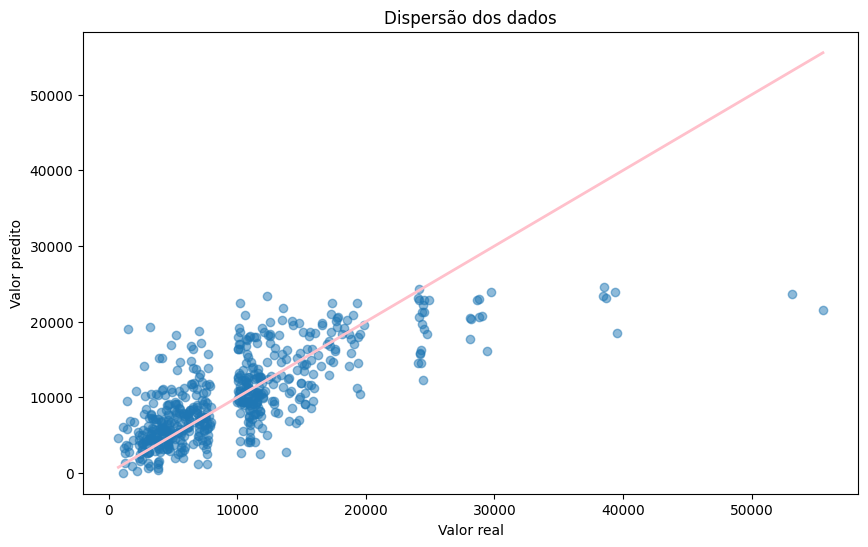

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.title('Dispersão dos dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='pink', linewidth=2)
plt.show

In [ ]:
nomes_atributos = x_train.columns

In [ ]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior'],
      dtype='object')

In [ ]:
pd.DataFrame(modelo.coef_, columns=['coeficientes'], index= nomes_atributos)

,coeficientes
IDADE,-136.361333
NAO_BRANCA,-424.930193
TEMPO_EXPERIENCIA,2118.631015
INSATISFACAO,-535.303646
NIVEL DE ENSINO,-640.625594
NUMERO DE FUNCIONARIOS,840.040914
GENERO_Masculino,481.032545
GENERO_Prefiro não informar,104.158909
REGIAO ONDE MORA_Nordeste,-490.337325
REGIAO ONDE MORA_Norte,-273.919099


In [ ]:
coefs = pd.DataFrame(modelo.coef_, columns=['coeficientes'], index= nomes_atributos)

In [ ]:
coefs

,coeficientes
IDADE,-136.361333
NAO_BRANCA,-424.930193
TEMPO_EXPERIENCIA,2118.631015
INSATISFACAO,-535.303646
NIVEL DE ENSINO,-640.625594
NUMERO DE FUNCIONARIOS,840.040914
GENERO_Masculino,481.032545
GENERO_Prefiro não informar,104.158909
REGIAO ONDE MORA_Nordeste,-490.337325
REGIAO ONDE MORA_Norte,-273.919099


In [ ]:
coefs = coefs.sort_values(by='coeficientes', ascending=False)

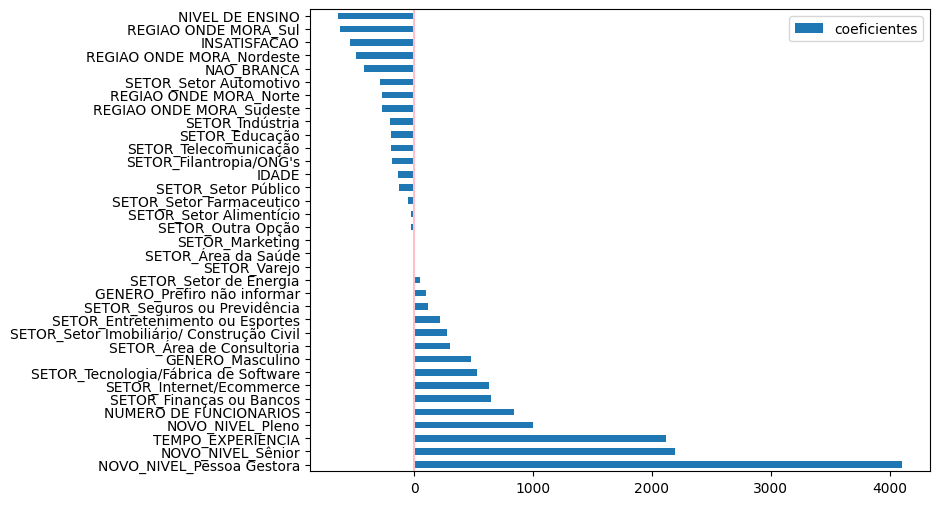

In [ ]:
coefs.plot.barh(figsize=(8,6))
plt.axvline(x=0, color='pink')